<a href="https://colab.research.google.com/github/camestres/Demo_repo/blob/main/Skillbox_DS_Day_2_12_04_22_%2B_Day_3_13_04_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# День 2

Данные 

https://drive.google.com/file/d/1Mccq5uUsWbsDlSbmEsMer1U_IkxZXAyr/view?usp=sharing

Или

https://disk.yandex.com/d/-834NzVzgyKAaw



Источник
https://www.cryptodatadownload.com/data/bitfinex/

In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile("/content/BitFinexData.zip", "r") as dataset:
  dataset.extractall("/content/bitfinex/")

In [ ]:
import pandas as pd
bitcoin = pd.read_csv("/content/bitfinex/Bitfinex_BTCUSD_d.csv", skiprows=1)

In [ ]:
bitcoin.head()

,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,1618272000000,2021-04-13 00:00:00,BTC/USD,59887.000000,60320.623935,59859.0,60240.0,4.288089e+06,71.183424
1,1618185600000,2021-04-12 00:00:00,BTC/USD,60033.000000,61338.000000,59492.0,59874.0,3.291828e+08,5497.925195
2,1618099200000,2021-04-11 00:00:00,BTC/USD,59817.073785,60722.000000,59308.0,60032.0,2.789436e+08,4646.581998
3,1618012800000,2021-04-10 00:00:00,BTC/USD,58134.090643,61243.000000,57900.0,59812.0,5.858312e+08,9794.542479
4,1617926400000,2021-04-09 00:00:00,BTC/USD,58110.000000,58880.000000,57713.0,58134.0,2.179731e+08,3749.493697


In [ ]:
bitcoin.describe()

,unix,open,high,low,close,Volume USD,Volume BTC
count,2.256000e+03,2256.000000,2256.000000,2256.000000,2256.000000,2.256000e+03,2256.000000
mean,1.929076e+11,7115.664125,7341.591874,6879.407790,7142.245854,1.215246e+08,20366.374715
std,5.203094e+11,10064.253430,10418.852532,9708.909314,10125.430503,1.988147e+08,21498.610698
min,1.423440e+09,212.630000,223.200000,162.000000,212.630000,0.000000e+00,0.000000
25%,1.472148e+09,630.035000,643.495000,618.022500,631.162500,9.853729e+06,6685.973840
50%,1.520856e+09,5246.250000,5396.875000,5072.600000,5282.300000,4.414414e+07,13150.671761
75%,1.569564e+09,9185.175000,9377.875000,8947.450000,9186.475000,1.347245e+08,26326.685000
max,1.618272e+12,61203.000000,61699.000000,59859.000000,61202.887014,2.223208e+09,266768.610000


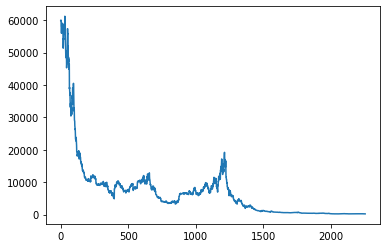

In [ ]:
bitcoin.open.plot()

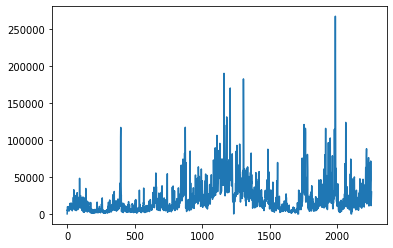

In [ ]:
bitcoin["Volume BTC"].plot()

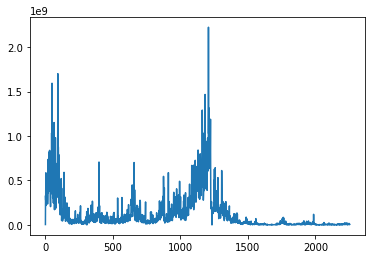

In [ ]:
bitcoin["Volume USD"].plot()

In [ ]:
bitcoin.head()

,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,1618272000000,2021-04-13 00:00:00,BTC/USD,59887.000000,60320.623935,59859.0,60240.0,4.288089e+06,71.183424
1,1618185600000,2021-04-12 00:00:00,BTC/USD,60033.000000,61338.000000,59492.0,59874.0,3.291828e+08,5497.925195
2,1618099200000,2021-04-11 00:00:00,BTC/USD,59817.073785,60722.000000,59308.0,60032.0,2.789436e+08,4646.581998
3,1618012800000,2021-04-10 00:00:00,BTC/USD,58134.090643,61243.000000,57900.0,59812.0,5.858312e+08,9794.542479
4,1617926400000,2021-04-09 00:00:00,BTC/USD,58110.000000,58880.000000,57713.0,58134.0,2.179731e+08,3749.493697


In [ ]:
# X = Входные
# y (target) = Выходные = Цену закрытия на завтра = Close

In [ ]:
# [::-1] - разворот в обратную сторону
bitcoin["open_mean_14d"] = bitcoin["open"][::-1].rolling(window=14).mean() # Средняя цена открытия за последние 14 дней
bitcoin["close_max_7d"] = bitcoin["close"][::-1].rolling(window=7).max() 

In [ ]:
for day in range(1,8):
  bitcoin[f"close_day_{day}"] = bitcoin["close"][::-1].shift(day+1)

In [ ]:
bitcoin["dt"] = pd.to_datetime(bitcoin["date"])

In [ ]:
bitcoin["weekday"] = bitcoin["dt"].dt.weekday
bitcoin["month"] = bitcoin["dt"].dt.month
bitcoin["year"] = bitcoin["dt"].dt.year

In [ ]:
bitcoin["target"] = bitcoin["close"].shift(1)

In [ ]:
bitcoin[["date", "close", "target"]].head()

,date,close,target
0,2021-04-13 00:00:00,60240.0,NaN
1,2021-04-12 00:00:00,59874.0,60240.0
2,2021-04-11 00:00:00,60032.0,59874.0
3,2021-04-10 00:00:00,59812.0,60032.0
4,2021-04-09 00:00:00,58134.0,59812.0


In [ ]:
bitcoin = pd.get_dummies(bitcoin, columns=["weekday", "month", "year"])
bitcoin.drop("date", axis=1, inplace=True)
bitcoin.drop("unix", axis=1, inplace=True)
bitcoin.drop("symbol", axis=1, inplace=True)
bitcoin.drop("dt", axis=1, inplace=True)
# dropna - удалить строки
# fillna - заполнить строчки
bitcoin.dropna(inplace=True)
bitcoin.head()

,open,high,low,close,Volume USD,Volume BTC,open_mean_14d,close_max_7d,close_day_1,close_day_2,...,month_10,month_11,month_12,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021
1,60033.000000,61338.0,59492.0,59874.0,3.291828e+08,5497.925195,58389.918730,60032.0,59812.0,58134.0,...,0,0,0,0,0,0,0,0,0,1
2,59817.073785,60722.0,59308.0,60032.0,2.789436e+08,4646.581998,58086.347301,60032.0,58134.0,58110.0,...,0,0,0,0,0,0,0,0,0,1
3,58134.090643,61243.0,57900.0,59812.0,5.858312e+08,9794.542479,57805.199174,59812.0,58110.0,55962.0,...,0,0,0,0,0,0,0,0,0,1
4,58110.000000,58880.0,57713.0,58134.0,2.179731e+08,3749.493697,57580.049842,59145.0,55962.0,57991.0,...,0,0,0,0,0,0,0,0,0,1
5,55962.000000,58155.0,55714.0,58110.0,2.604657e+08,4482.287596,57097.714896,59145.0,57991.0,59145.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y = bitcoin.target
X = bitcoin.drop("target", axis=1)

# Обучающая (тренировочная) - Учебник (X_train, y_train)
# Тестовая (проверочная) - Экзамен (X_test) => Сравнить y_pred == y_test


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_test

,open,high,low,close,Volume USD,Volume BTC,open_mean_14d,close_max_7d,close_day_1,close_day_2,...,month_10,month_11,month_12,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021
728,5042.79,5256.70,5029.60,5234.400000,4.320018e+07,8374.110000,5114.559286,5310.10,5194.400000,5103.74,...,0,0,0,0,0,0,0,1,0,0
908,6736.00,6779.90,6566.70,6613.200000,8.381661e+07,12542.020000,6560.005000,6754.20,6754.200000,6742.00,...,1,0,0,0,0,0,1,0,0,0
1548,820.30,837.89,813.94,829.470000,5.024261e+06,6079.140000,911.207857,909.51,816.630000,825.89,...,0,0,0,0,0,1,0,0,0,0
241,11762.00,11997.00,11705.00,11873.418254,4.726606e+07,4038.108323,11585.806678,11892.00,11792.460076,11583.00,...,0,0,0,0,0,0,0,0,1,0
687,8729.87,8958.30,8650.00,8806.100000,1.547536e+08,17561.850000,7912.457857,8806.10,8055.000000,7990.10,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,9397.00,9442.30,9242.20,9301.560000,4.306175e+07,4603.230000,8726.078571,9397.00,8912.000000,8621.50,...,0,0,0,0,0,0,0,0,1,0
272,9263.40,9280.00,9179.00,9210.100000,8.283573e+06,897.580000,9239.403571,9315.80,9252.000000,9315.80,...,0,0,0,0,0,0,0,0,1,0
1781,472.99,543.00,472.99,531.740000,3.669963e+07,72380.770000,449.627857,531.74,453.630000,448.27,...,0,0,0,0,1,0,0,0,0,0
245,11893.00,11943.00,11123.00,11379.000000,7.903918e+07,7105.923151,11443.275939,11892.00,11675.320070,11764.00,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.metrics import max_error, mean_absolute_error, r2_score

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) #  Обучение
y_pred = model.predict(X_test) #  Экзамен
print("Max Error =", max_error(y_test, y_pred))
print("MAE =", mean_absolute_error(y_test, y_pred))
print("R2 =", r2_score(y_test, y_pred))

Max Error = 7308.191099691321
MAE = 235.8168925064214
R2 = 0.9968263783521333


In [ ]:
model = LinearRegression(positive=True)
model.fit(X_train, y_train) #  Обучение
y_pred = model.predict(X_test) #  Экзамен
print("Max Error =", max_error(y_test, y_pred))
print("MAE =", mean_absolute_error(y_test, y_pred))
print("R2 =", r2_score(y_test, y_pred))

Max Error = 6280.7983354761745
MAE = 227.91854433555696
R2 = 0.9971409276069231


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(max_depth=10,random_state=42)
model.fit(X_train, y_train) #  Обучение
y_pred = model.predict(X_test) #  Экзамен
print("Max Error =", max_error(y_test, y_pred))
print("MAE =", mean_absolute_error(y_test, y_pred))
print("R2 =", r2_score(y_test, y_pred))

Max Error = 6018.726650286393
MAE = 245.21317144320025
R2 = 0.996363133858801


# День 3

In [ ]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(random_state=42)

params = {
    "n_estimators": [50, 100, 500],
    "max_depth": [3, 10],
    "min_samples_split": [2, 4]
}
gs = GridSearchCV(model, params, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 10], 'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 500]},
             scoring='neg_mean_squared_error')

In [ ]:
gs.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
gs.best_score_

-414865.30294523283

In [ ]:
best_model = gs.best_estimator_

In [ ]:
import pickle 

f = open("rfr.model", "wb") # Открываем файл
pickle.dump(best_model, f)  # Записываем обученную модель в файл

In [ ]:
my_model_file = open("rfr.model", "rb")
my_model = pickle.load(my_model_file)
my_model

RandomForestRegressor(max_depth=10, random_state=42)

# Gradient Descent

# Градиентный спуск

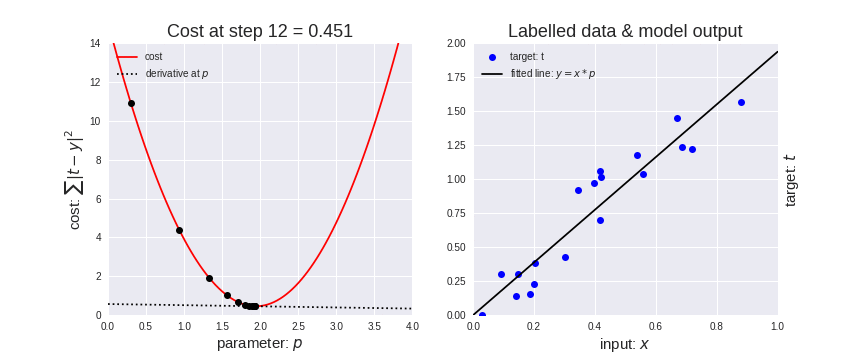